In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("Dataset/PHFood_Brazil.csv", low_memory=False)

# Displaying the first few rows of the dataset to check
df.head()

,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values in each column:
Unnamed: 0                            0
Year                                  0
Food                               2196
Food (English)                     2196
Region                             1026
State                              1026
Harvest Area (hectares)            6611
Food Production (tons)             6611
Energy (kcal)                      6611
Protein (g)                       23495
Lipids (g)                         6611
Carbohydrates (g)                  6611
Fiber (g)                         23495
Calcium (mg)                       6611
Magnesium (mg)                     8121
Manganese (mg)                    25005
Phosphorus (mg)                   23495
Iron (mg)                         23495
Potassium (mg)                     8121
Copper (mg)                        8121
Zinc (mg)                          8121
Selenium (mcg)                    64284
Retinol (mcg)                    433881
Vitamin A (mcg)                  183858
Vitamin B

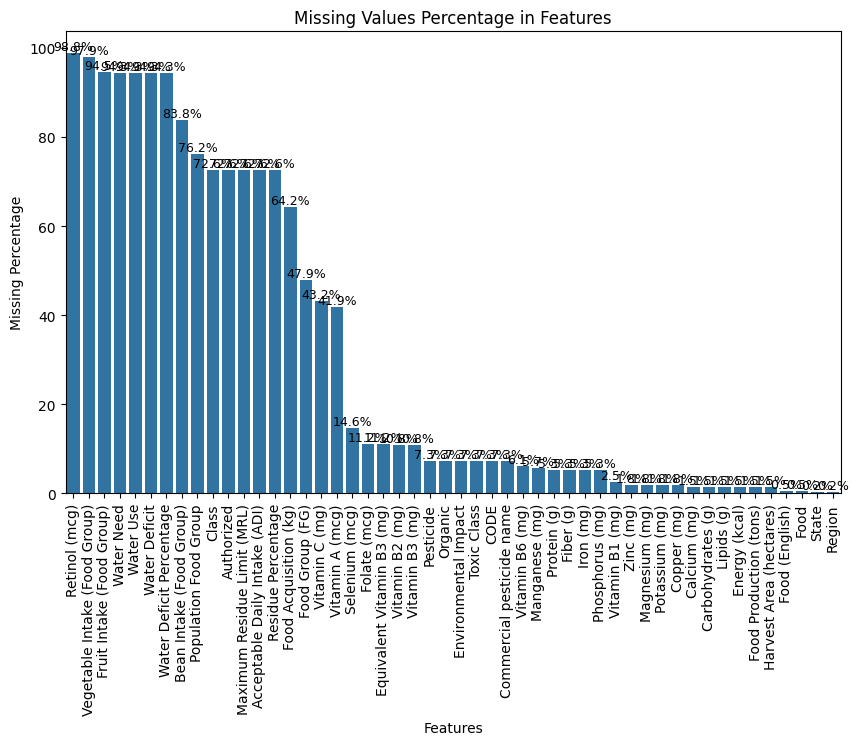

In [2]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Check for missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage in Features")

# Annotate the bars with percentages
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [3]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Check remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  439299 non-null  int64  
 1   Year                        439299 non-null  int64  
 2   Food                        437103 non-null  object 
 3   Food (English)              437103 non-null  object 
 4   Region                      438273 non-null  object 
 5   State                       438273 non-null  object 
 6   Harvest Area (hectares)     432688 non-null  float64
 7   Food Production (tons)      432688 non-null  float64
 8   Energy (kcal)               432688 non-null  float64
 9   Protein (g)                 415804 non-null  float64
 10  Lipids (g)                  432688 non-null  float64
 11  Carbohydrates (g)           432688 non-null  float64
 12  Fiber (g)                   415804 non-null  float64
 13  Calcium (mg)  

In [4]:
# Display all column names
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class',
       'Environmental Impact', 'Food Group (FG)'],
      dtype='object')


In [5]:
# List of columns to drop
columns_to_drop = ["Unnamed: 0", "Year", "Region", "State", "Harvest Area (hectares)", "Food Production (tons)", "CODE", "Commercial pesticide name", "Pesticide","Organic", "Toxic Class","Environmental Impact", "Food","Food Group (FG)"] 

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Food (English)              437103 non-null  object 
 1   Energy (kcal)               432688 non-null  float64
 2   Protein (g)                 415804 non-null  float64
 3   Lipids (g)                  432688 non-null  float64
 4   Carbohydrates (g)           432688 non-null  float64
 5   Fiber (g)                   415804 non-null  float64
 6   Calcium (mg)                432688 non-null  float64
 7   Magnesium (mg)              431178 non-null  float64
 8   Manganese (mg)              414294 non-null  float64
 9   Phosphorus (mg)             415804 non-null  float64
 10  Iron (mg)                   415804 non-null  float64
 11  Potassium (mg)              431178 non-null  float64
 12  Copper (mg)                 431178 non-null  float64
 13  Zinc (mg)     

In [6]:
# Fill numerical columns with mean
num_imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['number']))

# Fill categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")
df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

In [7]:
# Checking summary statistics to identify scaling needs
df.describe()

,Energy (kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),Calcium (mg),Magnesium (mg),Manganese (mg),Phosphorus (mg),Iron (mg),...,Zinc (mg),Selenium (mcg),Vitamin A (mcg),Vitamin B1 (mg),Vitamin B2 (mg),Vitamin B3 (mg),Equivalent Vitamin B3 (mg),Vitamin B6 (mg),Folate (mcg),Vitamin C (mg)
count,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,...,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05
mean,1.728772e+12,5.799736e+10,5.250432e+10,2.995857e+11,3.476083e+10,3.477856e+11,3.817566e+11,3.926159e+09,1.009952e+12,1.662100e+10,...,6.718893e+09,4.473336e+10,9.330020e+10,1.315947e+09,1.112909e+09,7.768030e+09,2.125395e+10,1.000689e+09,3.292956e+11,5.238785e+10
std,1.191925e+13,3.344501e+11,2.648563e+11,3.005304e+12,1.538663e+11,2.187452e+12,1.960049e+12,2.297299e+10,5.210624e+12,1.028233e+11,...,3.156754e+10,2.068322e+11,2.658392e+11,5.880623e+09,5.821175e+09,3.650488e+10,9.777678e+10,5.075236e+09,1.372779e+12,3.036492e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.940000e+07,1.712500e+06,3.080000e+05,1.258190e+07,3.125000e+06,1.952987e+07,2.500000e+07,1.848000e+05,3.618808e+07,4.148000e+05,...,2.640000e+05,1.141800e+07,3.401036e+08,1.104000e+05,1.175000e+05,7.504000e+05,2.162000e+06,1.522200e+05,3.135000e+07,5.771500e+08
50%,1.469840e+10,4.820437e+08,1.379004e+08,2.565502e+09,5.633000e+08,2.823240e+09,4.522616e+09,4.832450e+07,8.589800e+09,1.350520e+08,...,6.869824e+07,4.938800e+08,9.330020e+10,1.461464e+07,9.066120e+06,5.281020e+07,2.744539e+08,1.353856e+07,6.070680e+09,5.238785e+10
75%,1.623137e+11,6.716398e+09,2.315175e+09,3.021552e+10,6.252883e+09,3.562737e+10,4.929877e+10,6.066187e+08,1.104386e+11,2.086096e+09,...,9.284396e+08,2.296962e+10,9.330020e+10,1.539486e+08,1.654200e+08,1.397150e+09,4.461464e+09,1.928242e+08,1.548332e+11,5.238785e+10
max,3.314224e+14,6.327424e+12,4.415128e+12,8.994979e+13,2.281523e+12,3.878589e+13,3.270183e+13,6.094993e+11,9.316220e+13,1.954885e+12,...,4.954670e+11,4.112795e+12,1.086597e+13,9.008491e+10,1.083724e+11,7.196332e+11,1.685285e+12,8.897941e+10,2.907930e+13,5.156729e+13


In [9]:
import pandas as pd

# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Finding correlation matrix
corr_matrix = numeric_df.corr().abs()

# Extract upper triangle of correlation matrix to remove duplicates
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

# Finding highly correlated features (above 0.85)
high_corr_features = upper_tri.stack().reset_index()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display highly correlated features
print("Highly Correlated Features (above 0.85):\n", high_corr_features[high_corr_features['Correlation'] > 0.85])

Highly Correlated Features (above 0.85):
                       Feature 1          Feature 2  Correlation
2                 Energy (kcal)  Carbohydrates (g)     0.959180
21                  Protein (g)         Lipids (g)     0.937246
23                  Protein (g)          Fiber (g)     0.865434
24                  Protein (g)       Calcium (mg)     0.912076
25                  Protein (g)     Magnesium (mg)     0.917472
..                          ...                ...          ...
218             Vitamin B2 (mg)    Vitamin B6 (mg)     0.971278
219             Vitamin B2 (mg)       Folate (mcg)     0.894932
225  Equivalent Vitamin B3 (mg)    Vitamin B6 (mg)     0.978296
226  Equivalent Vitamin B3 (mg)       Folate (mcg)     0.940785
228             Vitamin B6 (mg)       Folate (mcg)     0.862126

[92 rows x 3 columns]


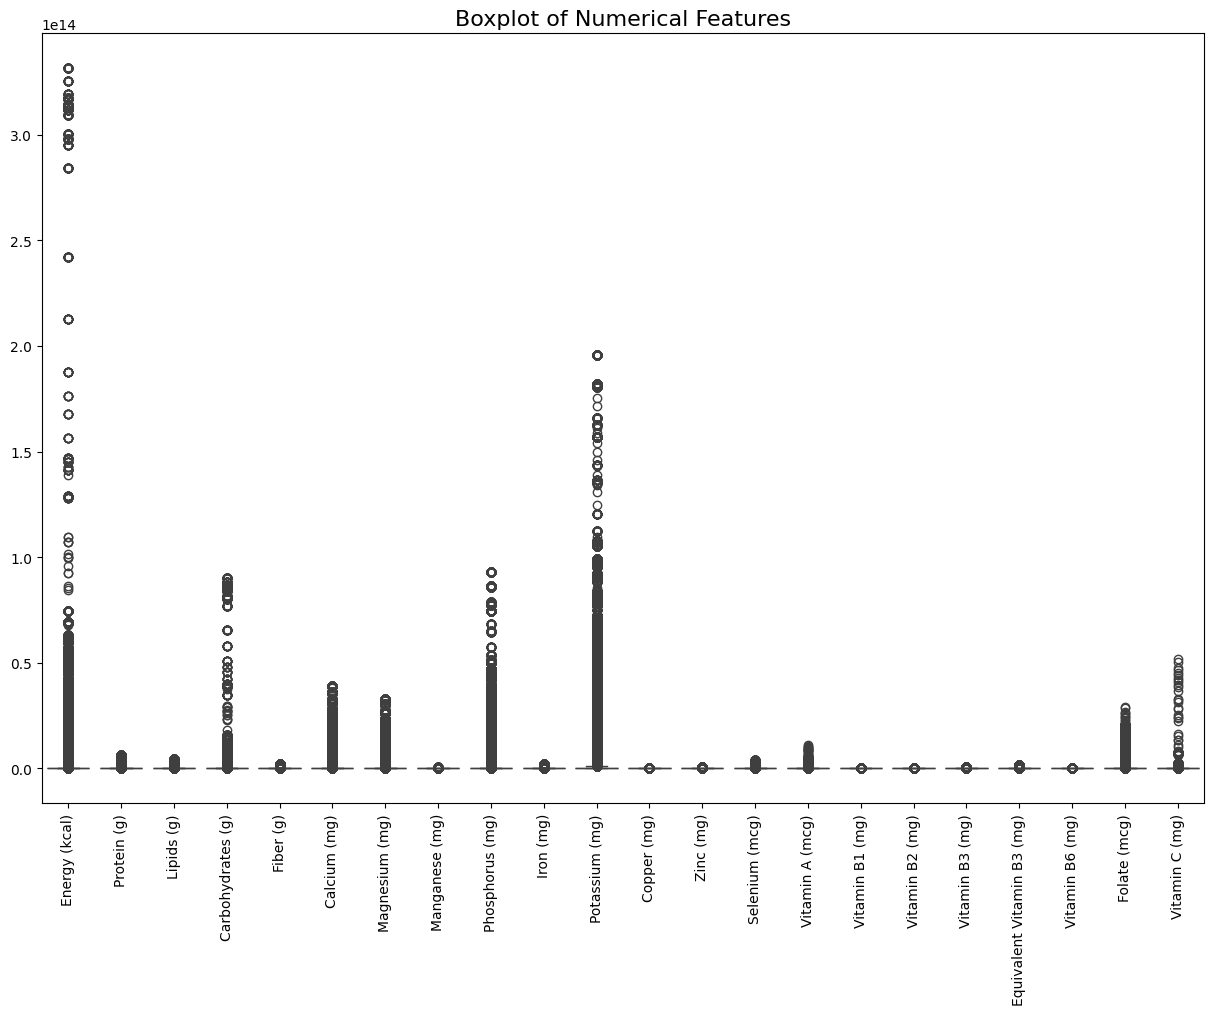

In [10]:
# Summary statistics for numerical columns
df.describe()

# Data distribution for numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
# Boxplot for numerical columns to check for spread and any potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Compute Q1, Q3, and IQR for numerical columns
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers detected by IQR method:")
print(outliers_iqr)



Number of Outliers detected by IQR method:
Energy (kcal)                 81123
Protein (g)                   84322
Lipids (g)                    82879
Carbohydrates (g)             78737
Fiber (g)                     83056
Calcium (mg)                  73681
Magnesium (mg)                80781
Manganese (mg)                79407
Phosphorus (mg)               83125
Iron (mg)                     82429
Potassium (mg)                75221
Copper (mg)                   76400
Zinc (mg)                     82717
Selenium (mcg)                35482
Vitamin A (mcg)               23701
Vitamin B1 (mg)               77081
Vitamin B2 (mg)               94241
Vitamin B3 (mg)               97672
Equivalent Vitamin B3 (mg)    91699
Vitamin B6 (mg)               79096
Folate (mcg)                  35446
Vitamin C (mg)                21765
dtype: int64


In [16]:
# Remove outliers
df_no_outliers_iqr = df[~((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show dataset shape changes
rows_removed = df.shape[0] - df_no_outliers_iqr.shape[0]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (IQR method): {df_no_outliers_iqr.shape}")
print(f"Total rows removed: {rows_removed}")


Original shape: (439299, 23)
Shape after removing outliers (IQR method): (291761, 23)
Total rows removed: 147538


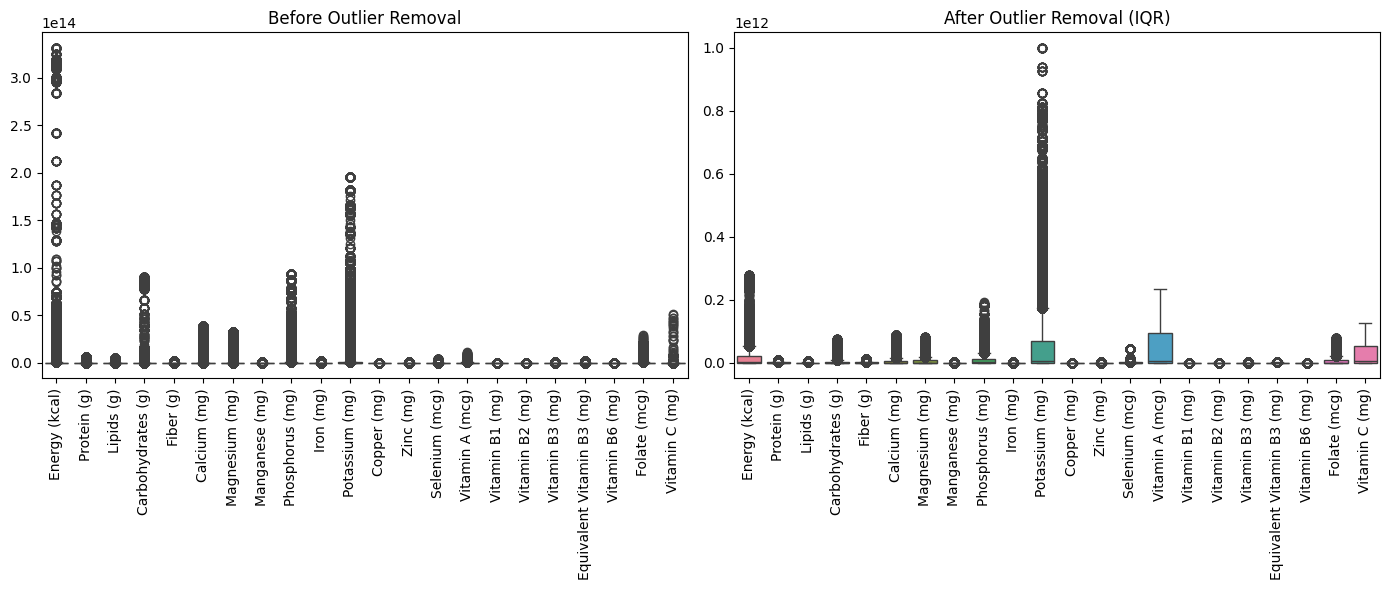

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns again to avoid issues
numeric_cols = df.select_dtypes(include=['number']).columns

# Adjust figure size for better visualization
plt.figure(figsize=(14, 6))

# Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)  # Rotate feature labels for better readability
plt.title('Before Outlier Removal')

# After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers_iqr[numeric_cols])
plt.xticks(rotation=90)  # Rotate labels for consistency
plt.title('After Outlier Removal (IQR)')

plt.tight_layout()
plt.show()

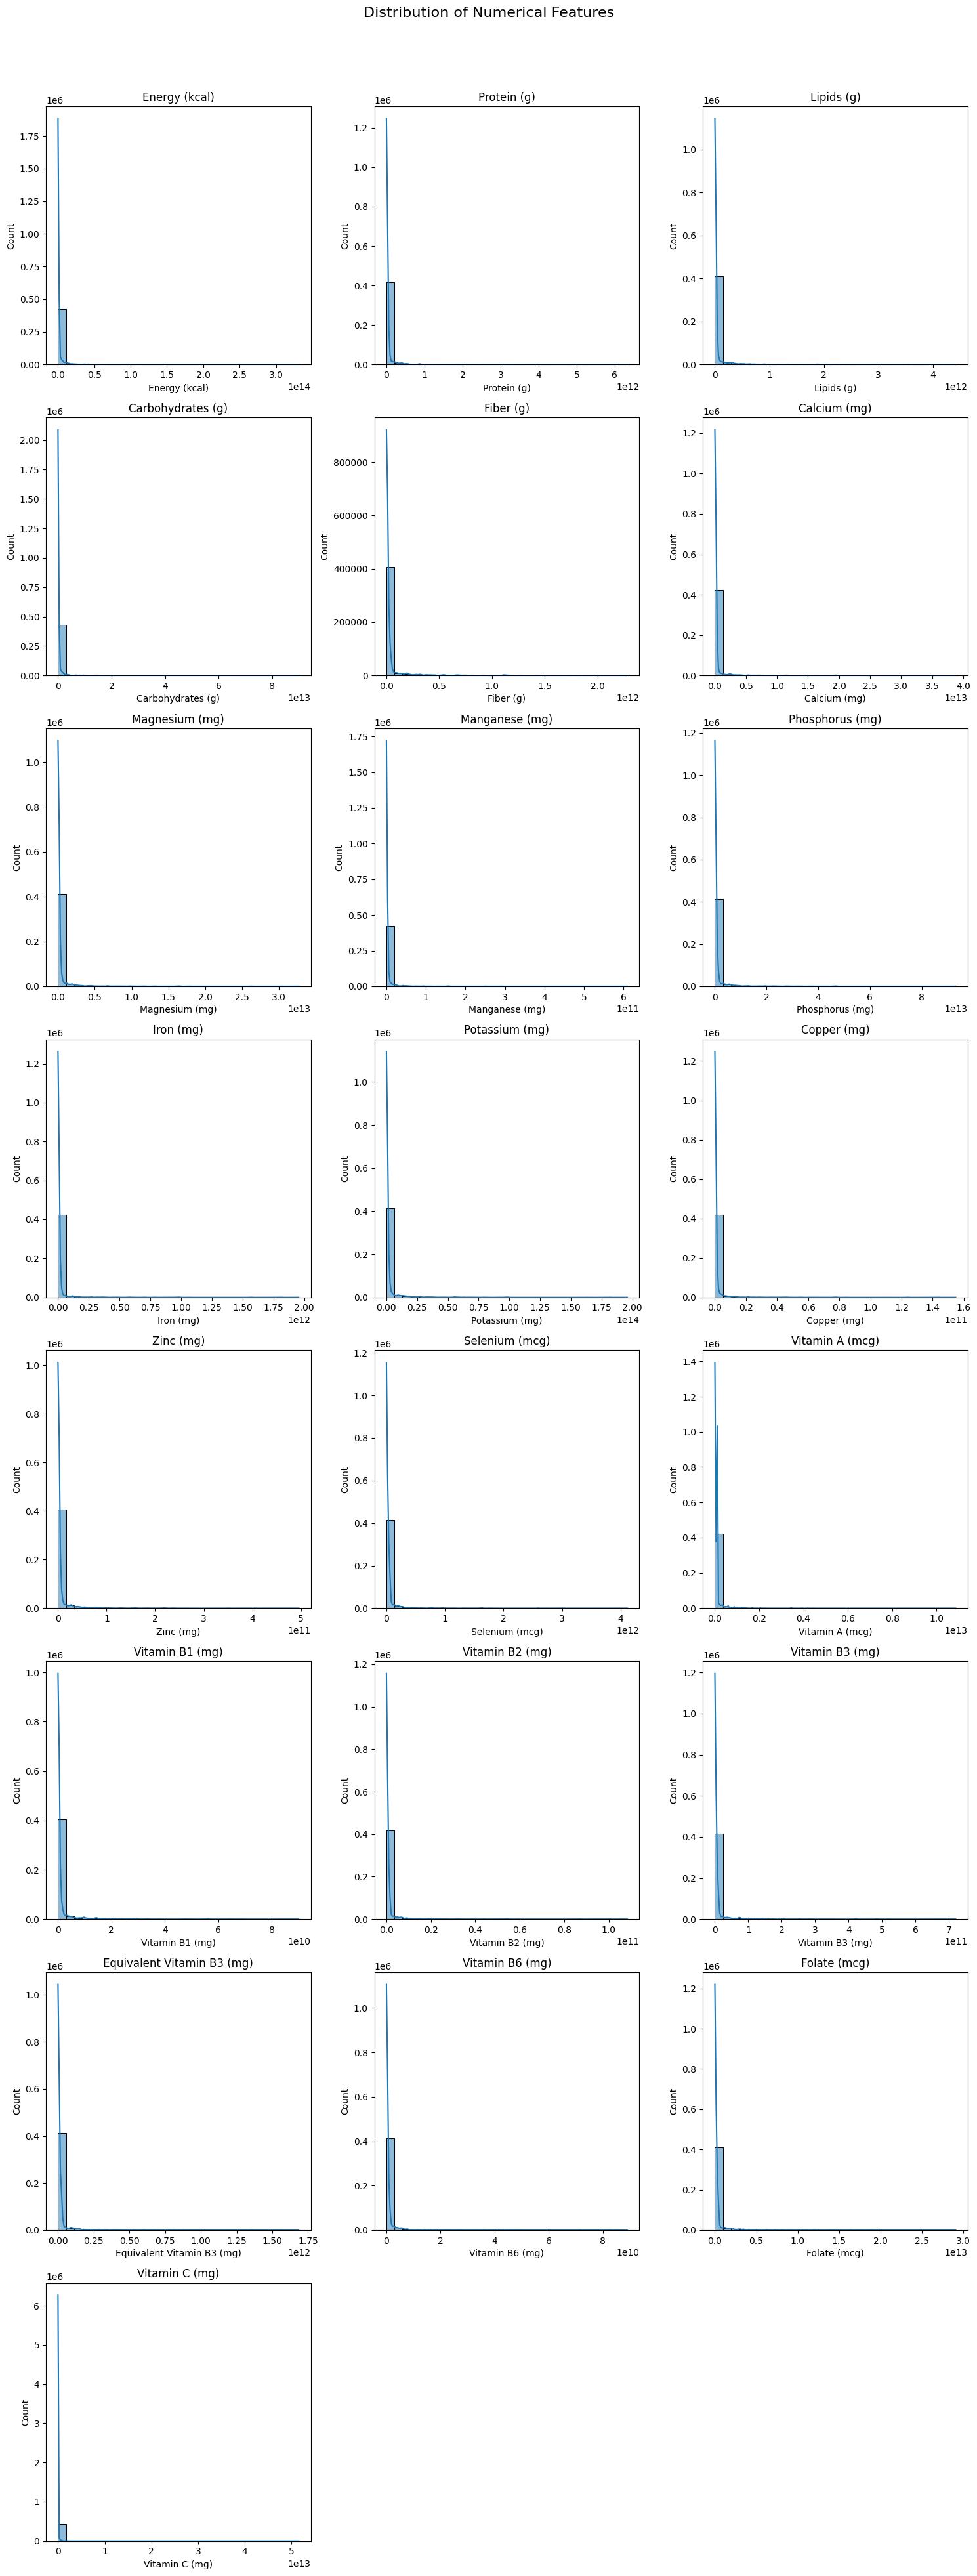

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine grid size for subplots
num_features = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = -(-num_features // cols)  # Compute rows needed (ceiling division)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # KDE for density visualization
    axes[i].set_title(col)

# Hide any extra subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()


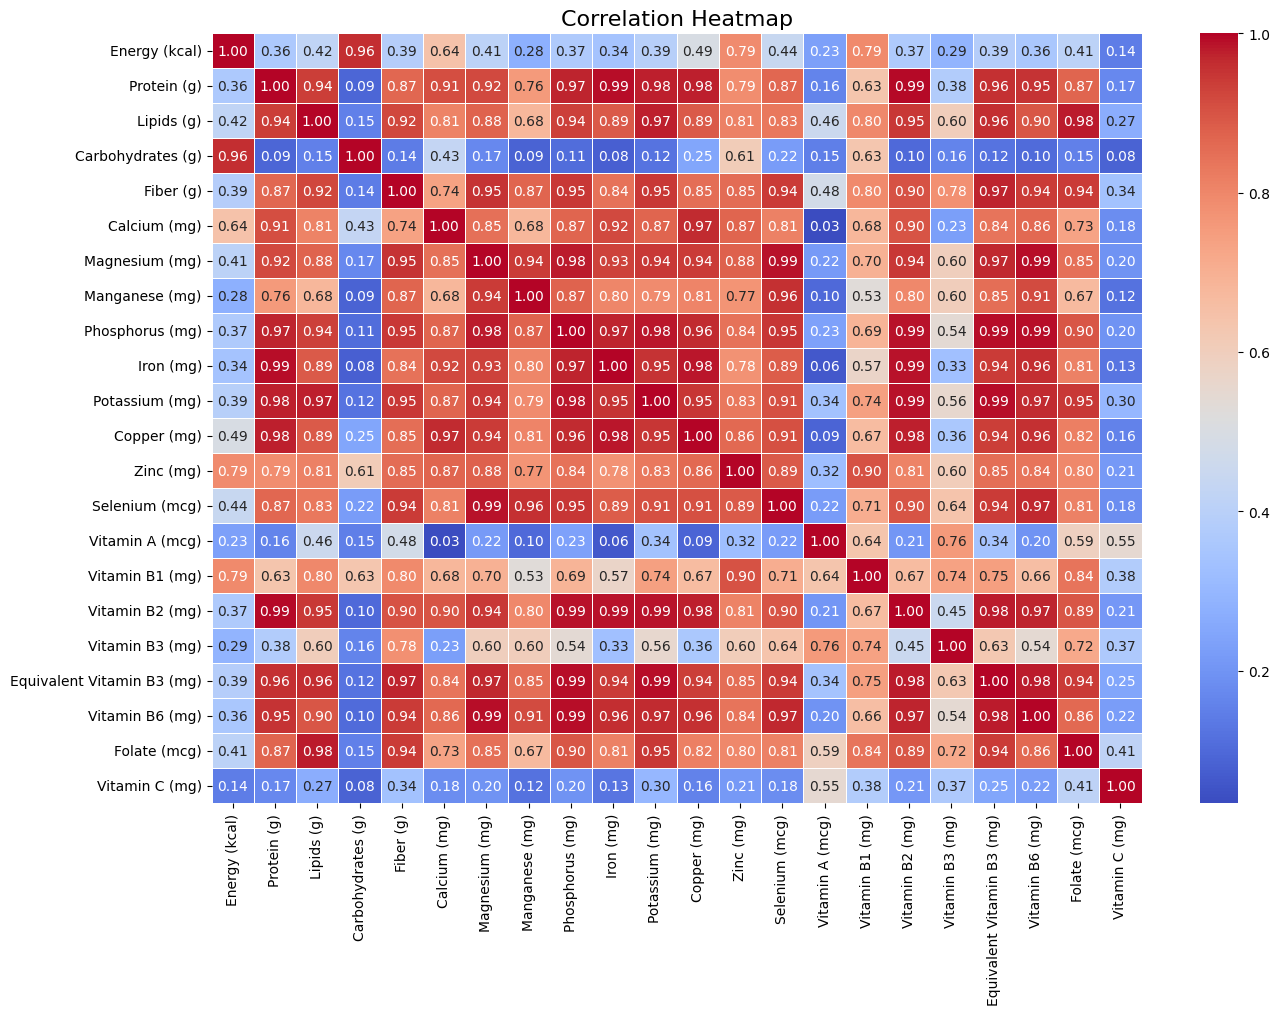

In [20]:
# Correlation heatmap for numerical features
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

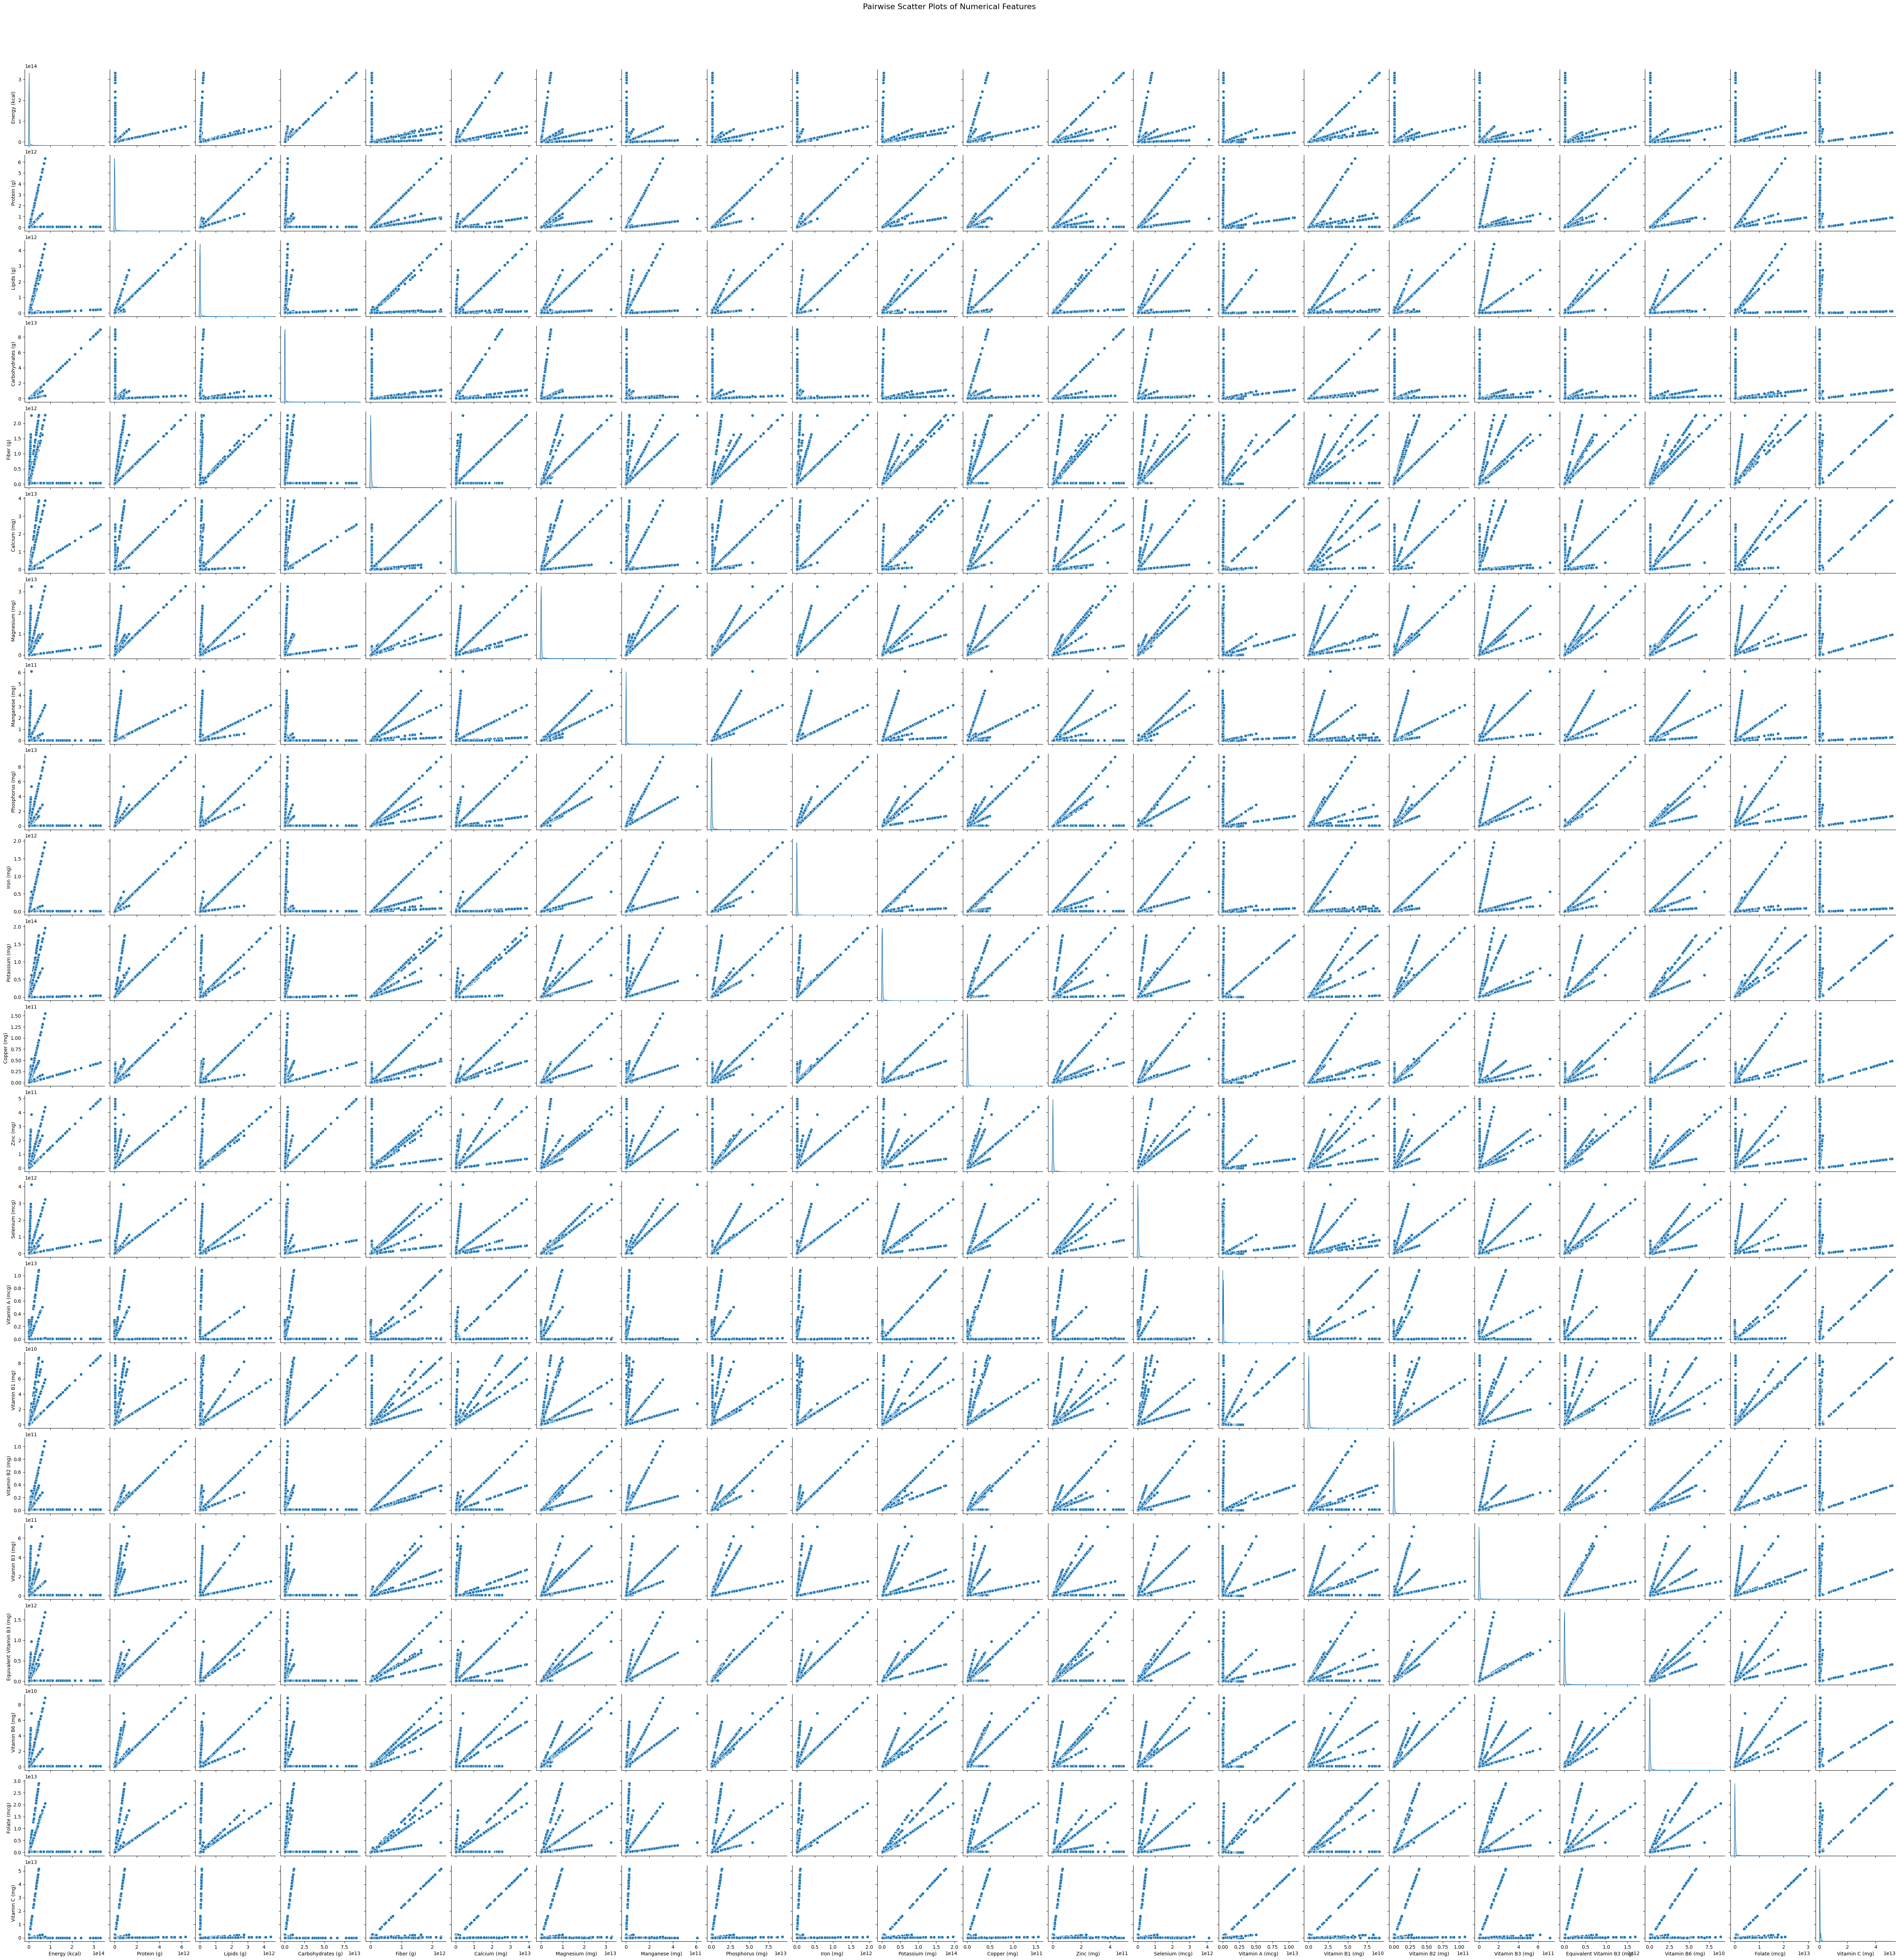

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for all numerical columns
sns.pairplot(df[numerical_columns], diag_kind='kde')  # 'kde' for smoother distributions
plt.suptitle("Pairwise Scatter Plots of Numerical Features", y=1.02, fontsize=16)
plt.show()

In [23]:
#Model Training and Evaluation

#Creating  target variable column as it is not present in the dataset
df["healthy"] = df["Energy (kcal)"] < 250  # Replace with correct column name
df["healthy"] = df["healthy"].astype(int)

In [24]:
# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +  # Protein is weighted higher
    df["Fiber (g)"] * 1.5 +  # Fiber is crucial
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -  # Unhealthy factors reduce the score
    df["Carbohydrates (g)"] * 0.5
)

# Classify foods as healthy if their health_score is above the 75th percentile
df["healthy"] = (df["health_score"] > df["health_score"].quantile(0.75)).astype(int)

In [25]:
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)
#Foods above the median score → healthy = 1
#Foods below the median score → healthy = 0

In [36]:
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(columns=["health_score", "healthy"])  # Features
y = df["healthy"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (351439, 23)
Testing set size: (87860, 23)


In [37]:
#checking if categorical column exist
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Food (English)']


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding only if categorical columns exist
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # ✅ Fixed parameter
    ],
    remainder='passthrough'
)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert back to DataFrame to retain column names
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print("✅ One-Hot Encoding Applied Successfully!")



✅ One-Hot Encoding Applied Successfully!


In [43]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert back to DataFrame after scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test.index)

print("✅ Feature Normalization Applied Successfully!")

✅ Feature Normalization Applied Successfully!


🔹 Model Accuracy: 0.9969
🔹 Precision: 0.9981
🔹 Recall: 0.9957
🔹 F1 Score: 0.9969


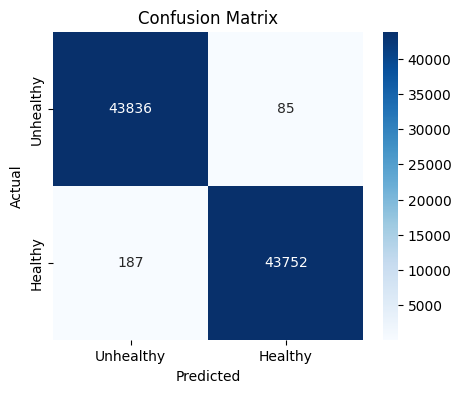

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model
model = LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced')  # ✅ Fix solver & balance classes
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # ✅ Dynamically get class labels

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Scores
print(f"🔹 Model Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"], cbar=True)  # ✅ Fix labels & add color bar
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

🔹 Model Accuracy: 1.0000
🔹 Precision: 1.0000
🔹 Recall: 1.0000
🔹 F1 Score: 1.0000


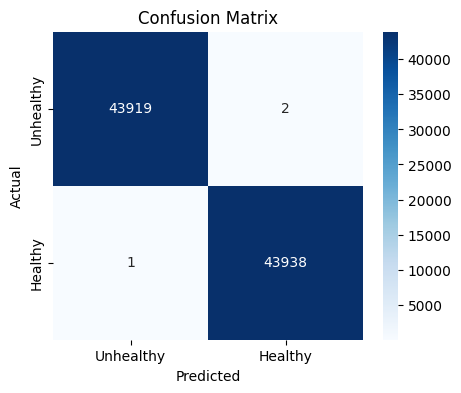

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters like max_depth
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Scores
print(f"🔹 Model Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")


# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"], cbar=True)  # ✅ Fix labels & add color bar
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()